# Image classification with MLP

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import random
from PIL import Image

import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.manifold import TSNE
import matplotlib.cm as cm

import pandas as pd
import seaborn as sns

import Mathematical_Morphology as morpho

In [2]:
def getClassIDfromChar(character, CaseSensitive=False):
    
    code = ord(character)
    
    if(code > 64 and code < 91):
        code = code - 7
        
    elif(code > 96 and code < 123):
        if(CaseSensitive):
            code = code - 13
        else:
            code = code - 39
        
    code = code - 48
    
    if(code == 183):
        if(CaseSensitive):
            code = 62
        else:
            code = 36
    elif(code == 151):
        if(CaseSensitive):
            code = 63
        else:
            code = 36
    elif(code == 193):
        if(CaseSensitive):
            code = 64
        else:
            code = 37
    elif(code == 161):
        if(CaseSensitive):
            code = 65
        else:
            code = 37
    
    return code

def getCharFromClassID(code, CaseSensitive=False):
    
    
    if(CaseSensitive):
        
        if(code == 62):
            return 'ç'
        elif(code == 63):
            return 'Ç'
        elif(code == 64):
            return 'ñ'
        elif(code == 65):
            return 'Ñ'
        
    else:
        
        if(code==36):
            return 'Ç'
        elif(code==37):
            return 'Ñ'
        
    
    code = code + 48
    
    if(code > 57 and code < 84):
        code = code + 7
        
    elif(code > 83 and code < 110):
        if(CaseSensitive):
            code = code + 13
        else:
            code = code + 39
        
    return chr(code)

In [4]:
dicClases = {}

X = []
y = []

for i in range(1, 6):
    path = '../imgs/chars/font' + str(i) + '/'

    for x in os.listdir(path):
        img = Image.open(path + x)
        img = img.resize((32, 21), resample=0)
        img = np.asarray(img, dtype=np.float32)[:, :, 0]
        
        clase = getClassIDfromChar(x[0], False)
        
        X.append(img.reshape(-1))
        y.append(clase)
        
        for j in range(0, 2):
            for k in range(0, 2):
                eImg = morpho.erode(img, j, k)
                X.append(eImg.reshape(-1))
                y.append(clase)
                
                dImg = morpho.dilate(img, j, k)
                X.append(dImg.reshape(-1))
                y.append(clase)
        
        
        if(clase not in dicClases):
            dicClases[clase] = x[0]
        
X = np.asarray(X)
y = np.asarray(y)

print(X.shape, y.shape)

(2925, 672) (2925,)


<IPython.core.display.Javascript object>


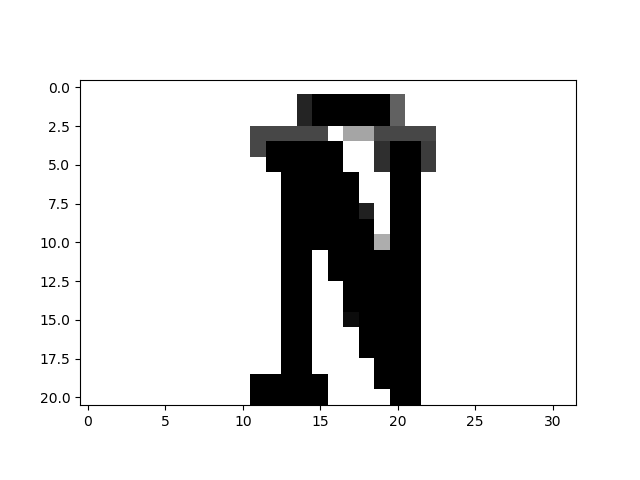

In [21]:
plt.figure()
plt.imshow(eImg, cmap="gray")
plt.show()

<IPython.core.display.Javascript object>


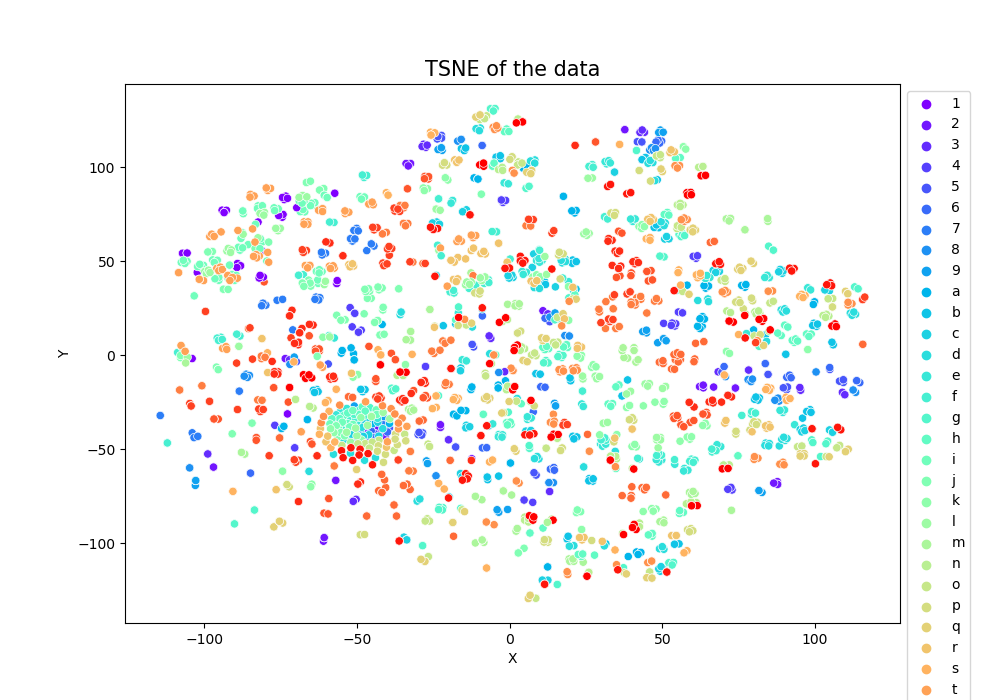

In [7]:
TX = X[0:]
TY = y[0:]

tsne = TSNE(n_components=2, random_state=0)
tsne_obj= tsne.fit_transform(TX)

tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1],'class':TY})
tsne_df.head()

paleta = cm.rainbow(np.linspace(0, 1, len(dicClases.keys()))).tolist()

plt.figure(figsize=[10,7])
plt.title('TSNE of the data', fontsize=15)
ax = sns.scatterplot(x="X", y="Y",hue="class",palette=paleta,legend='full',data=tsne_df)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, list(dicClases.values()), bbox_to_anchor=(1,1))
plt.show()

In [8]:
y = np.zeros((TY.shape[0], len(dicClases.keys()) + 1), np.uint8)

for i, tyVal in enumerate(TY):
    y[i, tyVal] = 1

In [9]:
X, y = shuffle(X, y, random_state=0)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify=y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2925, 672) (2925, 38)
(2340, 672) (585, 672) (2340, 38) (585, 38)


In [10]:
clf = MLPClassifier(random_state=1, max_iter=2000, hidden_layer_sizes=[400, 200, 200],
                    learning_rate_init=1.0e-6, alpha=0.01, momentum=0.9)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>


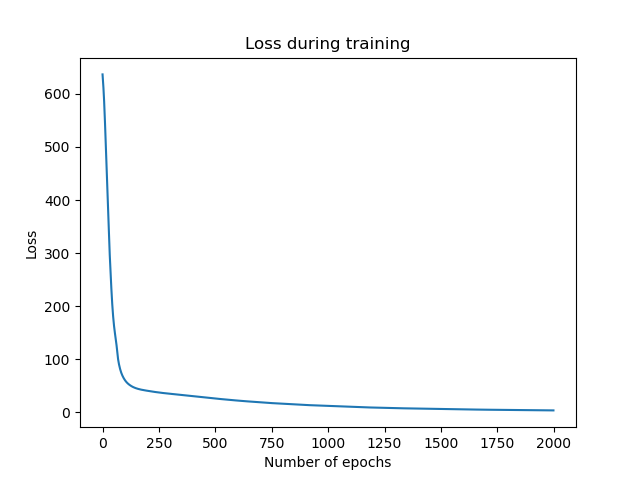

In [11]:
plt.figure()
plt.plot(clf.loss_curve_)
plt.title("Loss during training")
plt.ylabel("Loss")
plt.xlabel("Number of epochs")
plt.show()

In [12]:
print(y_test.argmax(axis=1)[0:10])
print(y_pred.argmax(axis=1)[0:10])

[35 25 33 36 20 35 24  1 12 18]
[ 0 25  0  0 10 35 24  1 12 18]


<IPython.core.display.Javascript object>


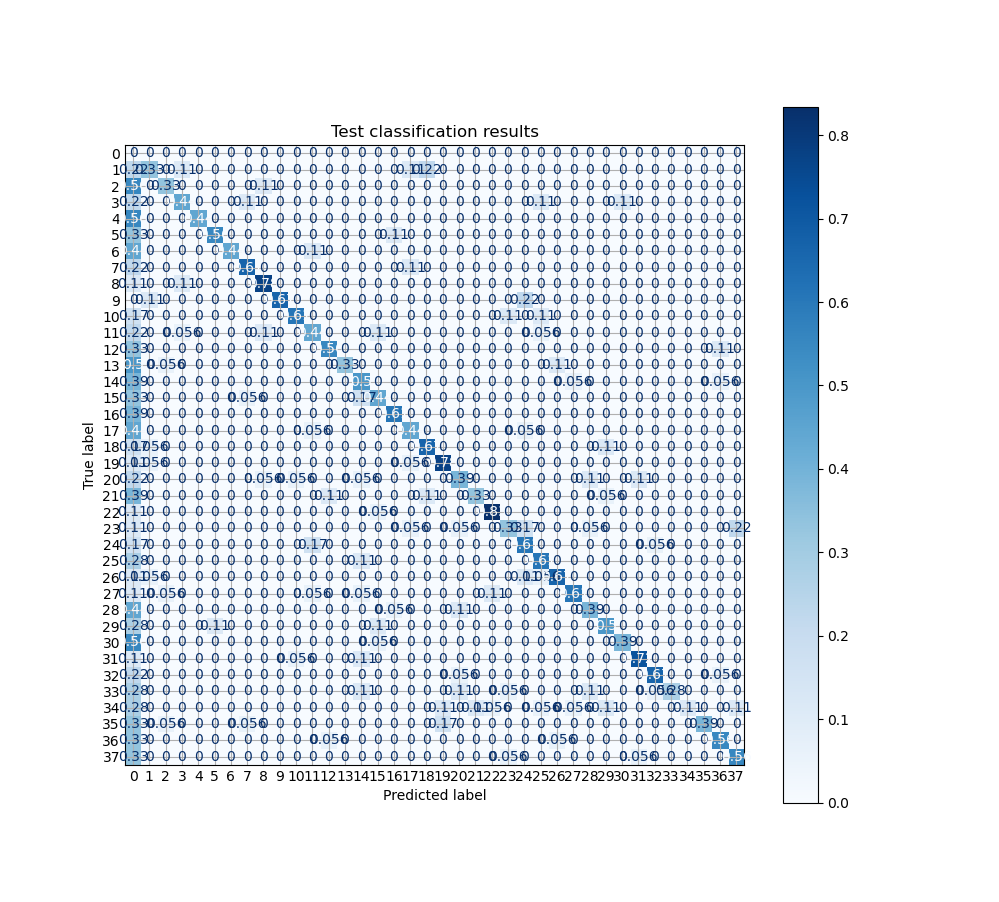

In [13]:
cmMT = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
cmd = ConfusionMatrixDisplay(cmMT)
cmd = cmd.plot(include_values=True, cmap='Blues', ax=None, xticks_rotation='horizontal')

plt.title("Test classification results")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()
    
tp = cmMT[0][0]
fp = cmMT[0][1]
fn = cmMT[1][0]
tn = cmMT[1][1]

#print('Accuracy:', round(acc,4))
#print('Precision:', round(prec,4))
#print('Recall: ', round(rec,4))        

### Export the MLP model

In [14]:
from joblib import dump

In [15]:
dump(clf, 'MLP.joblib')

['MLP.joblib']